In [1]:
import numpy as np;
import scipy as sp;
import matplotlib.pyplot as plt
from scipy import signal

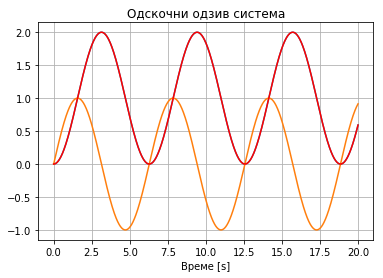

In [2]:
#1. Postavljanje polova pomocu povratne sprege po stanjima
A=np.matrix([[0, 1.], [-1, 0]])
B=np.matrix([[0], [1]])
C=np.matrix([[1,0]])
D=np.matrix([[0]])
W=signal.lti(A, B, C,D)
t=np.linspace(0,20,1000)

u=(t>=0)
tt,y,x=signal.lsim(W, u, t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y,'r')

plt.title("Одскочни одзив система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

In [3]:
P=np.array([-1,-2])
fsf1 = signal.place_poles(A, B, P)
K=fsf1.gain_matrix
fsf1.computed_poles 

array([-2., -1.])

In [4]:
#matrica pojacanja u povratnoj sprezi:
K

matrix([[ 1.,  3.]])

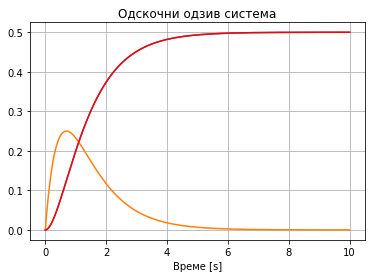

In [5]:
Ak=A-B*K
G=signal.lti(Ak, B, C,D)
t=np.linspace(0,10,1000)

u=(t>=0)
tt,y,x=signal.lsim(G, u, t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y,'r')

plt.title("Одскочни одзив система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

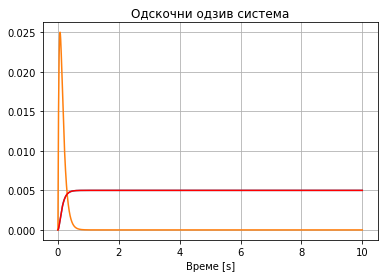

matrix([[ 199.,   30.]])

In [6]:
# ako hocemo bolje ponasanje sistema trazimo jos "brze" polove (dalje od imaginarne ose)
P=np.array([-10,-20])
fsf1 = signal.place_poles(A, B, P)
K=fsf1.gain_matrix
Ak=A-B*K
G=signal.lti(Ak, B, C,D)

u=(t>=0)
tt,y,x=signal.lsim(G, u, t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y,'r')

plt.title("Одскочни одзив система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()
K

In [7]:
# vidimo da je potrebno mnogo vece pojacanje, sto je cesto nemoguce izvesti zbog fizickih ogranicenja aktuatora!
# Drugi problem je ako merimo stanja sa sumom senzora, za velika pojacanja previse pojacavamo merni sum!
# Treci problem je, kao sto vidimo, greska u stacionarnom stanju, koja se cak povecava sa povecanjem pojacanja

In [8]:
# 2. Slabo kontrolabilan sistem => potrebno veliko pojacanje

In [9]:
# Funckija prenosa sistema: G(s)=(s-z)/(s^2+7s+12)  , gde cemo menjati  polozaj nule z
# Hocemo da postavimo polove tako da budu konjugovano kompleksni sa wn=2, zeta=0.5
# Polazimo od observabilne forme u prostoru stanja:
# Neka je nula z=-7 na pocetku, polovi su -3 i -4
z=-7
A=np.matrix([[-7, 1.], [-12, 0]])
B=np.matrix([[1], [-z]])
C=np.matrix([[1,0]])
D=np.matrix([[0]])

wn=2
zeta=0.5
P=np.array([-wn*zeta+1j*wn*np.sqrt(1-zeta**2),-wn*zeta-1j*wn*np.sqrt(1-zeta**2)])
fsf1 = signal.place_poles(A, B, P)
K=fsf1.gain_matrix
K

matrix([[ 10.75,  -2.25]])

In [10]:
# Ukoliko pomerimo nulu blizu nekog pola (-3 ili -4) , kontrolabilnost je slaba 
# i potrebno je veliko pojacanje za postaizanje istog polozaja polova:

In [11]:
z=-2.99
B=np.matrix([[1], [-z]])
fsf1 = signal.place_poles(A, B, P)
K=fsf1.gain_matrix
K

matrix([[ 2052.47524752,  -688.11881188]])

In [12]:
# 2. Povratna sprega po stanjima sa pracenjem referentnog odskocnog ulaza:
# Dodatna pojacanja se racunaju prema [Nx Nu]^T=[[A  B], [C  D]]^-1 * [0  1]^T
# a povratna sprega je u=-K(x-Nx*r)+Nu*r=-Kx+N*r  , N=(Nu+KNx)

#Oscilator iz prvog primera:

A=np.matrix([[0, 1.], [-1, 0]])
B=np.matrix([[0], [1]])
C=np.matrix([[1,0]])
D=np.matrix([[0]])

Nxu=np.concatenate((np.concatenate((A, B), axis=1),np.concatenate((C, D), axis=1)), axis=0)**(-1)*np.matrix([[0],[0], [1]])
Nx=Nxu[0:2,0]
Nu=Nxu[2,0]

P=np.array([-1,-2])
fsf1 = signal.place_poles(A, B, P)  # postavljamo polove na -1 i -2
K=fsf1.gain_matrix

N=Nu+K*Nx   # pojacanje koje je potrebno upotrebiti da bi se idealno pratila odskocna pobuda
N

matrix([[ 2.]])

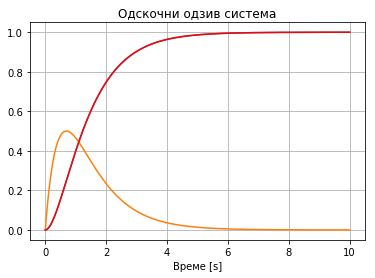

In [13]:
Ak=A-B*K
Br=np.matrix([[0], [N]])
G=signal.lti(Ak, Br, C,D)
t=np.linspace(0,10,1000)

u=(t>=0)
tt,y,x=signal.lsim(G, u, t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y,'r')

plt.title("Одскочни одзив система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

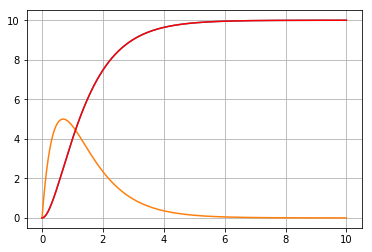

In [14]:
# vidimo da je greska u stacionarnom stanju nula!
# Ako promenimo vrednost ulaznog odskocnog signala:
u=10*(t>=0)
tt,y,x=signal.lsim(G, u, t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y,'r')
plt.grid()
plt.show()

In [15]:
# izlaz i dalje idealno prati ulaz u stacionaranom stanju!
# Ako promenimo polozaj polova, tj. matricu povratne sprege K, moramo da racunamo novu vrednost za pojacanje N:

P=np.array([-10,-15])
fsf1 = signal.place_poles(A, B, P)  # postavljamo polove definisane nizom P
K=fsf1.gain_matrix

N=Nu+K*Nx   # pojacanje koje je potrebno upotrebiti da bi se idealno pratila odskocna pobuda
N

matrix([[ 150.]])

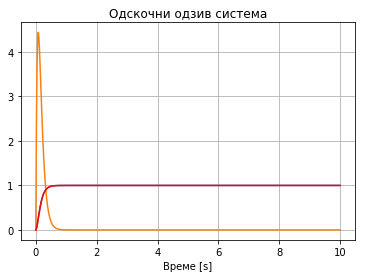

In [16]:
Ak=A-B*K
Br=np.matrix([[0], [N]])
G=signal.lti(Ak, Br, C,D)

u=(t>=0)
tt,y,x=signal.lsim(G, u, t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y,'r')

plt.title("Одскочни одзив система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

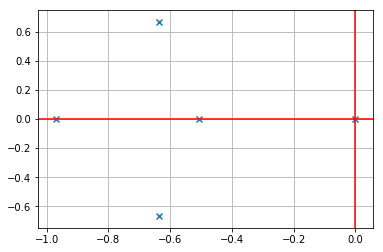

In [17]:
# 3. Dat je sistem u prostoru stanja:

A=np.matrix([[0., 2.,0,0,0], [-0.1, -0.35,0.1,0.1,0.75],[0, 0,0,2,0],[0.4, 0.4,-0.4,-1.4,0],[0, -0.03,0,0,-1]])
B=np.matrix([[0.], [0],[0],[0],[1]])
C=np.matrix([[0,0,1,0,0]])
D=np.matrix([[0]])
# Sopstvene vrednosti matrica A (polovi sistema bez zatvorene povratne sprege):
polovi, Ti = np.linalg.eig(A)

plt.scatter(polovi.real,polovi.imag,marker="x")
plt.axvline(x=0, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')

plt.grid()
plt.show()

In [18]:
# Hocemo da projektujemo povratnu spregu po stanjima tako da imamo par dominantnih konjugovano kompleksnih polova 
# tako da je vreme uspona 4s i preskok 5% , dakle wn=2/3, zeta=0.7
# Dakle, ostala tri pola biramo da budu oko 4 puta manja od realnog dela dominantnih polova: npr.
wn=2/3
zeta=0.7
p1=-wn*zeta+1j*wn*np.sqrt(1-zeta**2)
p2=-wn*zeta-1j*wn*np.sqrt(1-zeta**2)
p3=-4*wn*zeta
p4=-4.5*wn*zeta
p5=-5*wn*zeta
P=np.array([p1,p2,p3,p4,p5])
fsf1 = signal.place_poles(A, B, P)  # postavljamo polove definisane nizom P
K=fsf1.gain_matrix

In [19]:
K

matrix([[  3.14062551,  11.24222222,   0.24702881,  -2.17917695,
           4.48333333]])

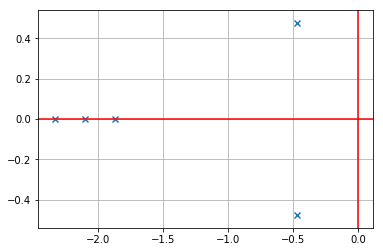

In [20]:
plt.scatter(fsf1.computed_poles .real,fsf1.computed_poles .imag,marker="x")
plt.axvline(x=0, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')

plt.grid()
plt.show()

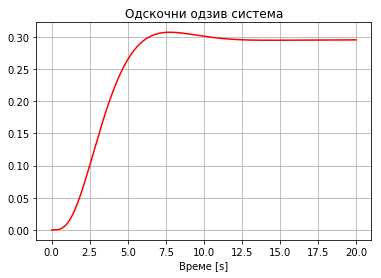

In [21]:
Ak=A-B*K
G=signal.lti(Ak, B, C,D)
t=np.linspace(0,20,1000)

u=(t>=0)
tt,y,x=signal.lsim(G, u, t)

plt.plot(tt,y,'r')

plt.title("Одскочни одзив система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

In [22]:
# greska u stacionarnom stanju nije nula iako je astatizam sistema 1 - mana ovakve povratne sprege po stanjima

In [23]:
# 4. Dizajn estimatora za oscilator iz prvog primera:
A=np.matrix([[0, 1.], [-1, 0]])
B=np.matrix([[0], [1]])
C=np.matrix([[1,0]])
D=np.matrix([[0]])

P=np.array([-1,-2])
fsf1 = signal.place_poles(A, B, P)
K=fsf1.gain_matrix

In [24]:
# Hocemo polove estimatora oko 5 puta brze od polova koje smo izabrali kod sistema sa zatvorenom povratnom spregom po stanjima
    
P=np.array([-5,-10])
fsf1 = signal.place_poles(A.T, C.T, P)
L=fsf1.gain_matrix
L=L.T
fsf1.computed_poles  

array([-10., -5.])

In [25]:
# Hocemo da simuliramo ukupan sistem estimator+povratna sprega po estimiranim stanjima:

A1u=np.concatenate((A-B*K, B*K), axis=1)
A2u=np.concatenate((np.matrix([[0,0], [0,0]]), A-L*C), axis=1)
Au=np.concatenate((A1u, A2u), axis=0)
Bu=np.concatenate((B, B), axis=0)
Cu=np.matrix([[1,0,0,0]])
Du=np.matrix([[0]])
# prva dva stanja su stanja procesa kojim upravljamo, druga dva su GRESKE estimatora

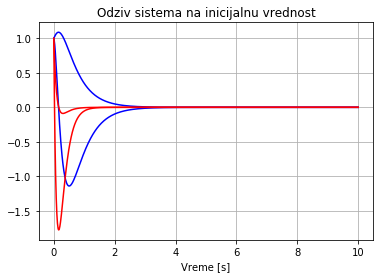

In [26]:
G=signal.lti(Au, Bu, Cu,Du)
t=np.linspace(0,10,1000)

# simuliramo odziv na pocetno stanje (ulaz se smatra da je nula)!
x0=[1,1,1,1]  # pocetno stanje je 1, pocetna greska je takodje 1
tt,y,x=signal.lsim(G, U=None, T=t, X0=x0)

plt.plot(tt,x[:,0],'b',tt,x[:,1],'b',tt,x[:,2],'r',tt,x[:,3],'r')

plt.title("Odziv sistema na inicijalnu vrednost")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

In [27]:
# Funckija prenosa ekvivalentnog kompenzatora:  C(s)=-K(sI-A+BK+LC)^(-1)*L
# Dakle mozemo racunati polove ekvivalentnog kompenzatora kao sopstvene vrednosti matrice A-BK-LC  !
polovi_kompenzatora, Ti = np.linalg.eig(A-B*K-L*C)
polovi_kompenzatora

array([-9.+3.87298335j, -9.-3.87298335j])

In [28]:
# Kompletna funckija prenosa (nule polovi, pojacanje):
[nule_c, polovi_c, pojacanje_c]=signal.ss2zpk(A-B*K-L*C, L, -K, [[0]])
nule_c, polovi_c, pojacanje_c

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1549: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


(array([-0.02469136]),
 array([-9.+3.87298335j, -9.-3.87298335j]),
 -161.99999999999926)

In [29]:
# Kompletna funckija prenosa:
[brojilac_c, imenilac_c]=signal.ss2tf(A-B*K-L*C, L, -K, [[0]])
brojilac_c, imenilac_c

(array([[   0., -162.,   -4.]]), array([  1.,  18.,  96.]))

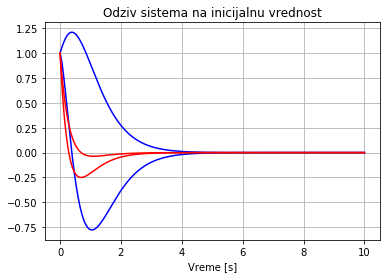

In [30]:
# Primer sa sporijim polovima estimatora:

P=np.array([-3,-2])
fsf1 = signal.place_poles(A.T, C.T, P)
L=fsf1.gain_matrix
L=L.T
A1u=np.concatenate((A-B*K, B*K), axis=1)
A2u=np.concatenate((np.matrix([[0,0], [0,0]]), A-L*C), axis=1)
Au=np.concatenate((A1u, A2u), axis=0)
Bu=np.concatenate((B, B), axis=0)
Cu=np.matrix([[1,0,0,0]])
Du=np.matrix([[0]])
G=signal.lti(Au, Bu, Cu,Du)
t=np.linspace(0,10,1000)

x0=[1,1,1,1]
tt,y,x=signal.lsim(G, U=None, T=t, X0=x0)

plt.plot(tt,x[:,0],'b',tt,x[:,1],'b',tt,x[:,2],'r',tt,x[:,3],'r')

plt.title("Odziv sistema na inicijalnu vrednost")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

In [31]:
# Funckija prenosa ekvivalentnog kompenzatora:  C(s)=-K(sI-A+BK+LC)^(-1)*L
# Dakle mozemo racunati polove ekvivalentnog kompenzatora kao sopstvene vrednosti matrice A-BK-LC  !
polovi_kompenzatora, Ti = np.linalg.eig(A-B*K-L*C)
polovi_kompenzatora

array([-4.+2.44948974j, -4.-2.44948974j])

In [32]:
# Kompletna funckija prenosa (nule polovi, pojacanje):
[nule_c, polovi_c, pojacanje_c]=signal.ss2zpk(A-B*K-L*C, L, -K, [[0]])
nule_c, polovi_c, pojacanje_c

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1549: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


(array([ 0.5]), array([-4.+2.44948974j, -4.-2.44948974j]), -19.999999999999986)

In [33]:
# Kompletna funckija prenosa:
[brojilac_c, imenilac_c]=signal.ss2tf(A-B*K-L*C, L, -K, [[0]])
brojilac_c, imenilac_c

(array([[  0., -20.,  10.]]), array([  1.,   8.,  22.]))

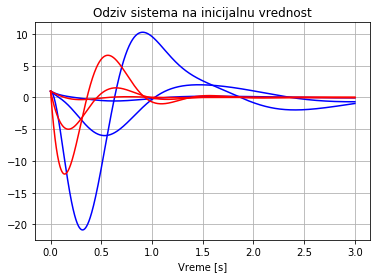

In [34]:
# Primer : Upravljanje DC motorom  G(s)=10/s(s+2)(s+8)
# postaviti polove procesa na p1=-1.4 p2,3=-1+- 2j  , polove estimatora na pe1=-4.2 , pe2,3=-3+-6.4j
# Opservabilna kanonicna forma:
Adc=np.matrix([[-10, 1., 0], [-16, 0, 1], [0, 0, 0]])
Bdc=np.matrix([[0], [0], [10]])
Cdc=np.matrix([[1,0,0]])
Ddc=np.matrix([[0]])

Pc=np.array([-1.4, -1+ 2*1j, -1- 2*1j])
fsf1 = signal.place_poles(Adc, Bdc, Pc)
K=fsf1.gain_matrix

Pe=np.array([-4.2, -3+ 6.4*1j, -3- 6.4*1j])
fsf1 = signal.place_poles(Adc.T, Cdc.T, Pe)
L=fsf1.gain_matrix
L=L.T

A1u=np.concatenate((Adc-Bdc*K, Bdc*K), axis=1)
A2u=np.concatenate((np.matrix([[0,0,0], [0,0,0],[0,0,0]]), Adc-L*Cdc), axis=1)
Au=np.concatenate((A1u, A2u), axis=0)
Bu=np.concatenate((Bdc, Bdc), axis=0)
Cu=np.matrix([[1,0,0,0,0,0]])
Du=np.matrix([[0]])
G=signal.lti(Au, Bu, Cu,Du)
t=np.linspace(0,3,1000)

x0=[1,1,1,1,1,1]
tt,y,x=signal.lsim(G, U=None, T=t, X0=x0)

plt.plot(tt,x[:,0:3],'b', tt,x[:,3:6],'r')

plt.title("Odziv sistema na inicijalnu vrednost")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()


In [35]:
polovi_kompenzatora, Ti = np.linalg.eig(Adc-Bdc*K-L*Cdc)
polovi_kompenzatora

array([-2.84511680+8.33302033j, -2.84511680-8.33302033j,  2.09023361+0.j        ])

In [36]:
# Kompletna funckija prenosa (nule polovi, pojacanje):
[nule_c, polovi_c, pojacanje_c]=signal.ss2zpk(Adc-Bdc*K-L*Cdc, L, -K, [[0]])
nule_c, polovi_c, pojacanje_c

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1549: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


(array([-2.08710889, -0.36248701]),
 array([-2.84511680+8.33302033j, -2.84511680-8.33302033j,  2.09023361+0.j        ]),
 -194.14768000000095)

In [37]:
# Kompletna funckija prenosa:
[brojilac_c, imenilac_c]=signal.ss2tf(Adc-Bdc*K-L*Cdc, L, -K, [[0]])
brojilac_c, imenilac_c

(array([[   0.     , -194.14768, -475.58336, -146.8824 ]]),
 array([   1.   ,    3.6  ,   65.64 , -162.064]))

In [38]:
# Vidimo da je jedan pol kompenzatora nestabilan! 
# Takvu situaciju treba izbeci jer ako se iz nekog razloga smanji pojacanje u povratnoj sprezi ukupan sistem ce biti nestabilan!

In [39]:
# menjamo trazene polozaje polova sistema i estimatora:
Pc=np.array([-8, -1.4+ 1.4*1j, -1.4- 1.4*1j])
# dakle ostavljmo pol u -8 koji postoji u FP DC motora
fsf1 = signal.place_poles(Adc, Bdc, Pc)
K=fsf1.gain_matrix

Pe=np.array([-8, -4.2+ 4.2*1j, -4.2- 4.2*1j])
fsf1 = signal.place_poles(Adc.T, Cdc.T, Pe)
L=fsf1.gain_matrix
L=L.T

In [40]:
K

matrix([[-0.464,  0.232,  0.08 ]])

In [41]:
# iako su polovi na dosta boljim pozicijama,
# mnogo manje vrednosti pojacanja su dobijene (nismo mnogo pomerali originalne polove,npr. ostavili smo nedominantni pol u -8)

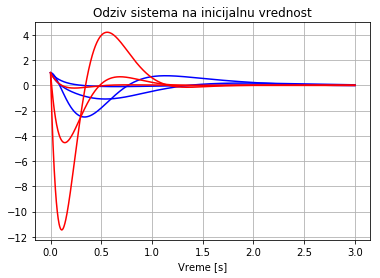

In [42]:
A1u=np.concatenate((Adc-Bdc*K, Bdc*K), axis=1)
A2u=np.concatenate((np.matrix([[0,0,0], [0,0,0],[0,0,0]]), Adc-L*Cdc), axis=1)
Au=np.concatenate((A1u, A2u), axis=0)
Bu=np.concatenate((Bdc, Bdc), axis=0)
Cu=np.matrix([[1,0,0,0,0,0]])
Du=np.matrix([[0]])
G=signal.lti(Au, Bu, Cu,Du)
t=np.linspace(0,3,1000)

x0=[1,1,1,1,1,1]
tt,y,x=signal.lsim(G, U=None, T=t, X0=x0)

plt.plot(tt,x[:,0:3],'b', tt,x[:,3:6],'r')

plt.title("Odziv sistema na inicijalnu vrednost")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

In [43]:
# vidimo da je odziv sistema bolji (bolji polozaj polova), a greska estimacije je slicna (polovi estimatora su slicni)

polovi_kompenzatora, Ti = np.linalg.eig(Adc-Bdc*K-L*Cdc)
polovi_kompenzatora

array([-9.01073401+0.j       , -4.09463299+5.2309352j,
       -4.09463299-5.2309352j])

In [44]:
# Kompletna funckija prenosa (nule polovi, pojacanje):
[nule_c, polovi_c, pojacanje_c]=signal.ss2zpk(Adc-Bdc*K-L*Cdc, L, -K, [[0]])
nule_c, polovi_c, pojacanje_c

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1549: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


(array([-8.        , -2.78875284]),
 array([-9.01073401+0.j       , -4.09463299+5.2309352j,
        -4.09463299-5.2309352j]),
 -39.67295999999979)

In [45]:
# Kompletna funckija prenosa:
[brojilac_c, imenilac_c]=signal.ss2tf(Adc-Bdc*K-L*Cdc, L, -K, [[0]])
brojilac_c, imenilac_c

(array([[   0.     ,  -39.67296, -428.02176, -885.10464]]),
 array([   1.   ,   17.2  ,  117.92 ,  397.632]))

In [46]:
# Sada je funckija prenosa kompenzatora stabilna!
# dakle treba razumno birati pozicije polova sistema sa povratnom spregom po estimiranim stanjima!